In [1]:
with open('out.txt') as f:
    lines = f.readlines()
    

In [2]:
len(lines)

10000

In [19]:
# count number of unique keys and alues

# for line in lines:

key_set = set()
val_set = set()

dict_list = lines[0].split('{')[1].split('}')[0].split(',')
total_length = 0
for d in dict_list:
    key = d.split(':')[0].strip()
    val= d.split(':')[1].strip()
    total_length += len(val) + len(key)
    if key not in key_set:
        key_set.add(key)
    if val not in val_set:
        val_set.add(val)




In [9]:
import os

def reverse_readline(filename, buf_size=8192, num_lines=10):
    """A generator that returns the lines of a file in reverse order"""
    with open(filename, 'rb') as fh:
        segment = None
        offset = 0
        fh.seek(0, os.SEEK_END)
        file_size = remaining_size = fh.tell()
        while remaining_size > 0 and num_lines > 0:
            offset = min(file_size, offset + buf_size)
            fh.seek(file_size - offset)
            buffer = fh.read(min(remaining_size, buf_size))
            # remove file's last "\n" if it exists, only for the first buffer
            if remaining_size == file_size and buffer[-1] == ord('\n'):
                buffer = buffer[:-1]
            remaining_size -= buf_size
            lines = buffer.split('\n'.encode())
            # append last chunk's segment to this chunk's last line
            if segment is not None:
                lines[-1] += segment
            segment = lines[0]
            lines = lines[1:]
            # yield lines in this chunk except the segment

            num_lines -= lines.count(b'')

            for line in reversed(lines):
                # only decode on a parsed line, to avoid utf-8 decode error
                yield line.decode()
        # Don't yield None if the file was empty
        if segment is not None:
            yield segment.decode()


In [11]:
# call the generator function


SyntaxError: 'yield' outside function (1182442244.py, line 1)

In [22]:
class RunningAverage:
    def __init__(self):
        self.total = 0
        self.count = 0
    
    def update_average(self, value):
        self.total += value
        self.count += 1
        return self.total / self.count
    
    def get(self):
        return self.total / self.count

# Example usage:
avg_calculator = RunningAverage()
print(avg_calculator.update_average(10))
print(avg_calculator.update_average(20))
print(avg_calculator.update_average(30))

10.0
15.0
20.0


In [23]:

key_set = set()
val_set = set()

avg_calculator = RunningAverage()

for line in lines: 

    dict_list = line.split('{')[1].split('}')[0].split(',')
    total_length = 0
    for d in dict_list:
        key = d.split(':')[0].strip()
        val= d.split(':')[1].strip()
        total_length += len(val) + len(key)
        if key not in key_set:
            key_set.add(key)
        if val not in val_set:
            val_set.add(val)

    avg_calculator.update_average(total_length)    



In [24]:
avg_calculator.get()

147.047

In [25]:
len(key_set)

6

In [26]:
len(val_set)

5049

In [28]:
normal_mnist_runs = [54.27317254199443, 54.43893554100214, 55.66749316699861, 56.836640499997884, 55.58471399999689]
instrumented_mnist_runs = [208.80613483300112, 210.31100999999762,216.68230700000277, 243.4741742499973, 238.5601472920025]
# runtime of 5 runs of 5 training epochs on Finn's mac m1; ask him for setup if you want to reproduce


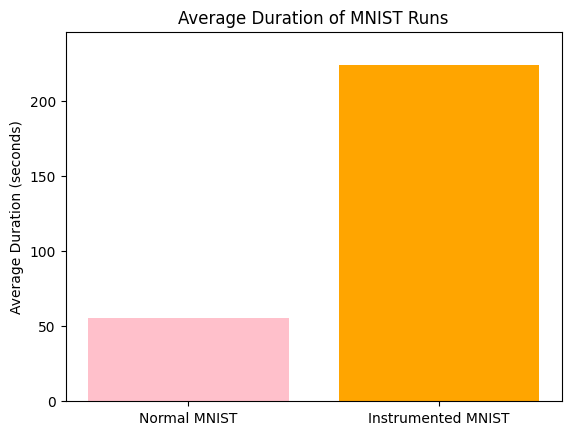

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Averaging the data
normal_avg = np.mean(normal_mnist_runs)
instrumented_avg = np.mean(instrumented_mnist_runs)

# Data for plotting
averages = [normal_avg, instrumented_avg]
labels = ['Normal MNIST', 'Instrumented MNIST']

# Creating the bar chart
fig, ax = plt.subplots()
ax.bar(labels, averages, color=['pink', 'orange'])

# Adding labels and title
ax.set_ylabel('Average Duration (seconds)')
ax.set_title('Average Duration of MNIST Runs')
ax.set_ylim(0, max(averages) * 1.1)  # Extend y-axis limit for better visualization

# Show the plot
plt.show()
